In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [136]:
from sklearn.datasets import load_wine

In [138]:
    # Cargar datos
    data = load_wine()
    X = data.data
    y = data.target.reshape(-1, 1)
    # print(data)
    df = pd.DataFrame(data=data.data, columns=data.feature_names)
    pd.set_option('display.float_format', '{:.2f}'.format)
    #print(len(X), np.shape(X), len(y), np.shape(y))
    

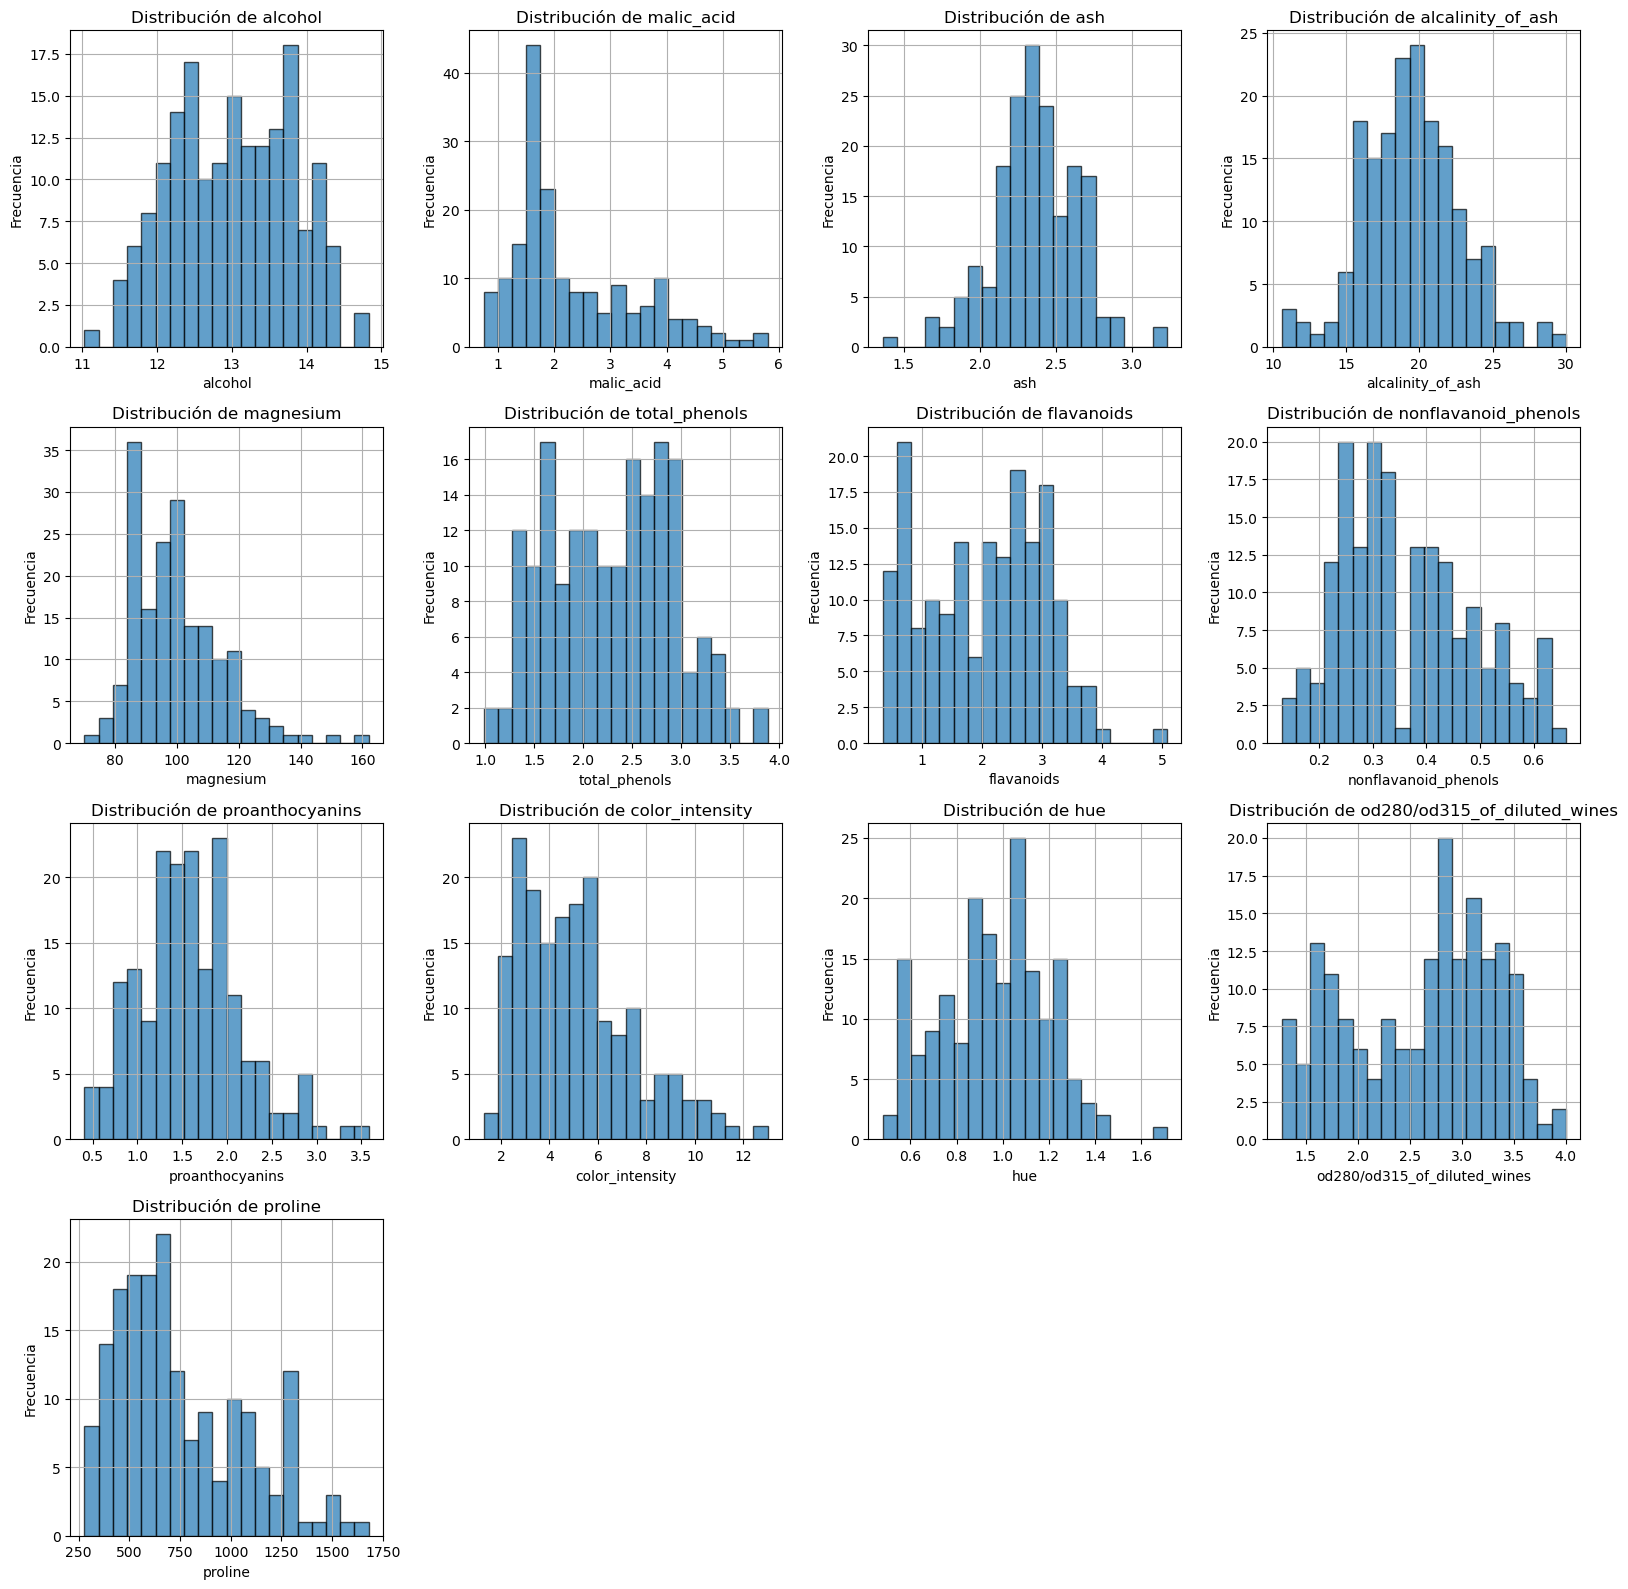

In [140]:
num_cols = X.shape[1]
# Determina el número de filas y columnas para los subplots
# Por ejemplo, 4 columnas por fila
feature_names = data.feature_names
class_names = data.target_names

cols_per_row = 4
rows = int(np.ceil(num_cols / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(4 * cols_per_row, 4 * rows))
axes = axes.flatten() # Aplana la matriz de ejes para facilitar la iteración

for i in range(num_cols):
    axes[i].hist(X[:, i], bins=20, edgecolor='black', alpha=0.7 )
    axes[i].set_title(f'Distribución de {feature_names[i]}')
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)


for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Estadísticas descriptivas del DataFrame:
       alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00 178.00             178.00     178.00   
mean     13.00        2.34   2.37              19.49      99.74   
std       0.81        1.12   0.27               3.34      14.28   
min      11.03        0.74   1.36              10.60      70.00   
25%      12.36        1.60   2.21              17.20      88.00   
50%      13.05        1.87   2.36              19.50      98.00   
75%      13.68        3.08   2.56              21.50     107.00   
max      14.83        5.80   3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13

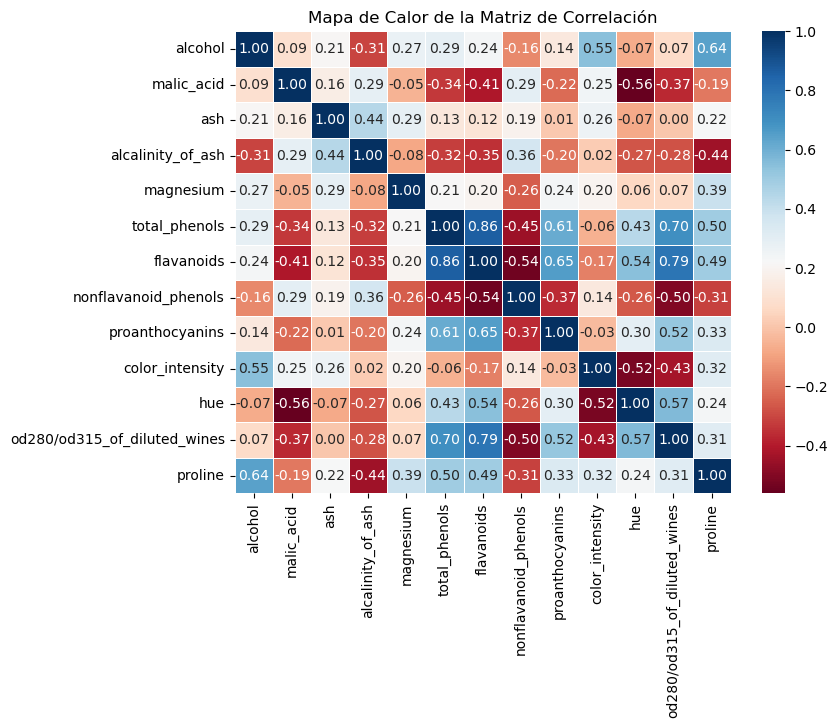

In [141]:
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())

print("\nMatriz de correlación:")
#print(df.corr())

plt.figure(figsize=(8, 6)) 
sns.heatmap(
    df.corr(),
    annot=True,     
    cmap='RdBu', 
    fmt=".2f",      
    linewidths=.5   
)
plt.title('Mapa de Calor de la Matriz de Correlación') 
plt.show() 


Accuracy: 94.44%


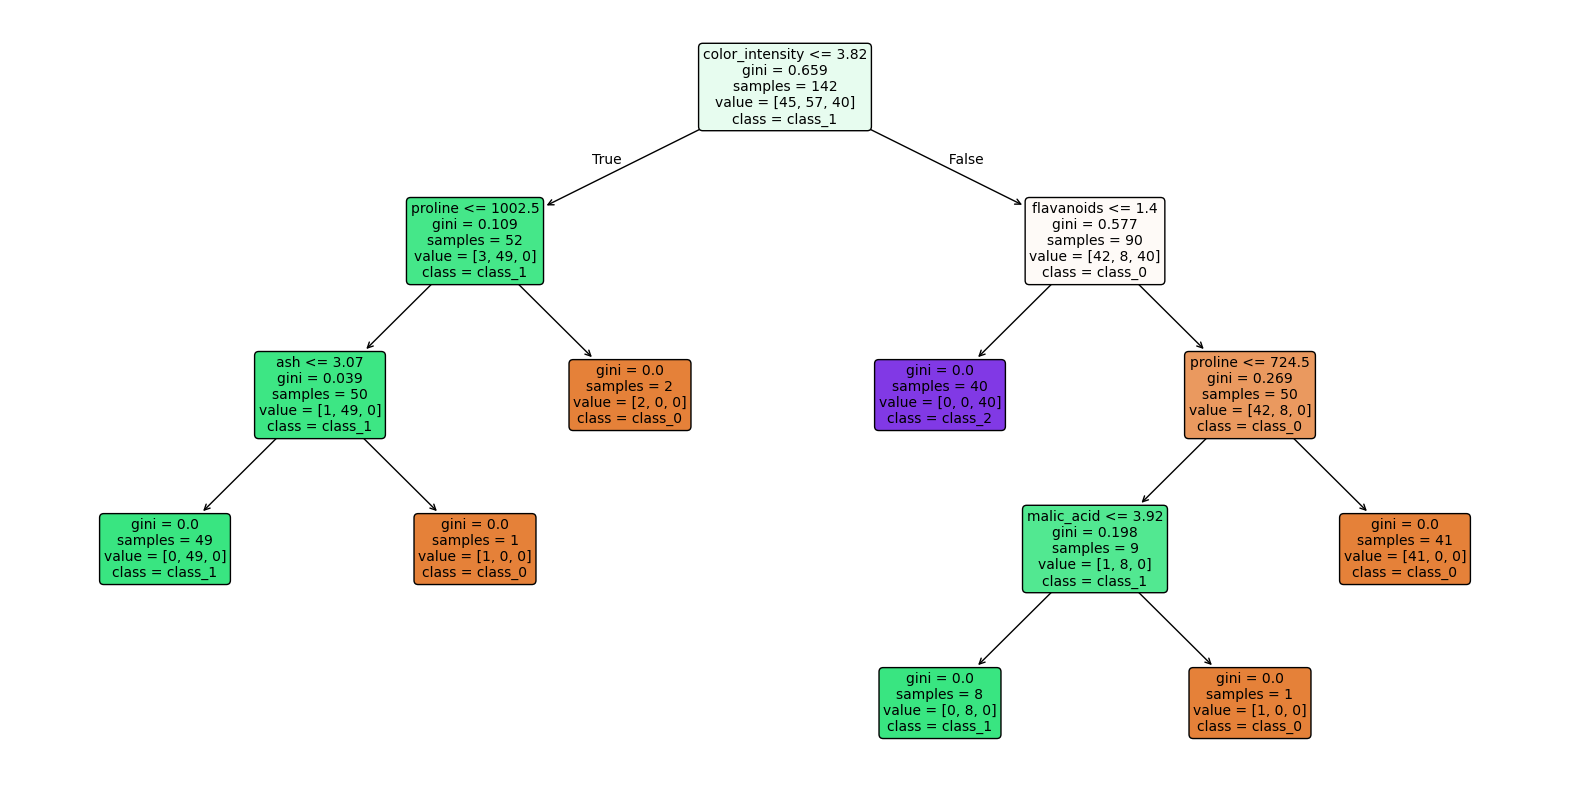

In [142]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluar precisión
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Visualizar el árbol
plt.figure(figsize=(20,10))

plot_tree(clf,
          feature_names=data.feature_names, # Nombres de los atributos (características)
          class_names=data.target_names,    # Nombres de las clases
          filled=True,                      # Rellenar los nodos con colores para las clases
          rounded=True,                     # Bordes redondeados de los nodos
          fontsize=10)   
plt.show()

# Accuracy es muy buena, 94,44% lo que significa que el decision tree es un buen modelo para describir y predecir la clase del vino, 
# en funcion de sus caracteristicas. 
# Decision tree es sin dudas un buen modelo para hacer este trabajo, ya que la relacion entre los valores de cada catacteristicas y el valor de las clases
# no es lineal, ni polinomica. Es muy conveniente porque permite mostrar las razones por la cual el algoritmo propone cada clase. 
# es conveniente porque no requiere normalizar los datos, como si sería necesario si usaramos la regresion logistica. 

In [143]:
#Probaremos tambien usando random forrest, a ver como cambia el resultado. 

In [154]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt') # 'sqrt' es un valor común para max_features

rf_model.fit(X_train, y_train.ravel())
# Realizo predicciones con el modelo entrenado
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión (Accuracy): {accuracy_rf:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))



Precisión (Accuracy): 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [156]:
#aqui se nota que el modelo funciona con una precision de 100%, lo que me permite sospechar que hay overfitting en este caso...